In [ ]:
!nvidia-smi

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/abstract'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/abstract/sample_submission.csv
/kaggle/input/abstract
/kaggle/input/abstract/train.csv
/kaggle/input/abstract
/kaggle/input/abstract/test.csv
/kaggle/input/abstract


In [3]:
import tensorflow as tf

print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.6.4
Eager mode:  True
GPU is available


In [6]:
import re
from sklearn.model_selection import train_test_split
from transformers import DistilBertModel, DistilBertTokenizerFast, TFDistilBertForSequenceClassification, DefaultDataCollator

In [7]:
data_collator = DefaultDataCollator(return_tensors="tf")

In [4]:
trainData = pd.read_csv('/kaggle/input/abstract/train.csv', sep=',', header="infer")
testData = pd.read_csv('/kaggle/input/abstract/test.csv', sep = ',', header = "infer")
testLabels = pd.read_csv('/kaggle/input/abstract/sample_submission.csv', sep = ',', header = "infer")

In [4]:
# labels = trainData.iloc[:,3:].values

logits = trainData['ComputerScience']

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
class DistilBERT:
    def __init__(self):
        self.trainData = pd.read_csv('/kaggle/input/abstract/train.csv', sep=',', header="infer")
        self.testData = pd.read_csv('/kaggle/input/abstract/test.csv', sep = ',', header = "infer")
        self.testLabels = pd.read_csv('/kaggle/input/abstract/sample_submission.csv', sep = ',', header = "infer")
        
    def preprocess(self):
        tra

# Dataset Exploration

In [ ]:
trainData.head()

In [ ]:
trainData.describe()

In [ ]:
len(trainData[trainData['Computer Science'] == 1])

In [ ]:
len(trainData[trainData['Physics'] == 1])

In [ ]:
len(trainData[trainData['Mathematics'] == 1])

In [ ]:
len(trainData[trainData['Statistics'] == 1])

In [ ]:
len(trainData[trainData['Quantitative Biology'] == 1])

In [ ]:
len(trainData[trainData['Quantitative Finance'] == 1])

In [41]:
list(trainData.groupby(['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']).aggregate('Quantitative Finance'))

[((0, 0, 0, 0, 0, 1),
  41       1
  268      1
  492      1
  622      1
  663      1
          ..
  20318    1
  20365    1
  20401    1
  20578    1
  20925    1
  Name: Quantitative Finance, Length: 209, dtype: int64),
 ((0, 0, 0, 0, 1, 0),
  9        0
  20       0
  33       0
  55       0
  115      0
          ..
  20466    0
  20482    0
  20597    0
  20644    0
  20691    0
  Name: Quantitative Finance, Length: 443, dtype: int64),
 ((0, 0, 0, 0, 1, 1),
  1792    1
  3441    1
  3471    1
  3769    1
  Name: Quantitative Finance, dtype: int64),
 ((0, 0, 0, 1, 0, 0),
  18       0
  40       0
  49       0
  65       0
  80       0
          ..
  20904    0
  20918    0
  20926    0
  20932    0
  20965    0
  Name: Quantitative Finance, Length: 1636, dtype: int64),
 ((0, 0, 0, 1, 0, 1),
  266      1
  683      1
  1182     1
  2737     1
  2888     1
  3180     1
  5673     1
  7742     1
  9356     1
  9904     1
  10215    1
  10391    1
  11241    1
  11603    1
  12312    

In [37]:
import numpy as np
np.where(trainData.iloc[:,3:].values == [0,0,1,1,0,1])

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
trainData.columns.values

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# -> Plot of class distributions

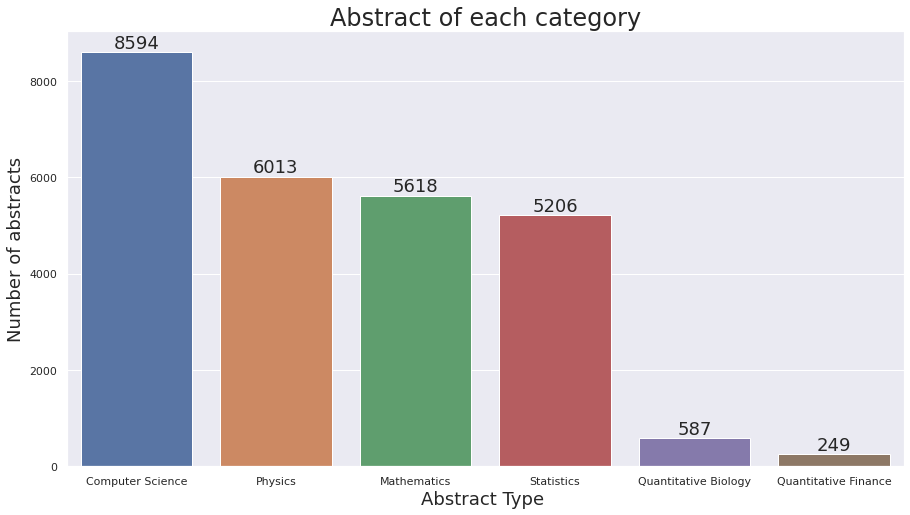

In [12]:
categories = list(trainData.columns.values[3:])
sns.set(font_scale = 1)
plt.figure(figsize=(15,8))
ax= sns.barplot(x = categories, y = trainData.iloc[:,3:].sum().values)
plt.title("Abstract of each category", fontsize=24)
plt.ylabel('Number of abstracts', fontsize=18)
plt.xlabel('Abstract Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = trainData.iloc[:,3:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
    
plt.show()


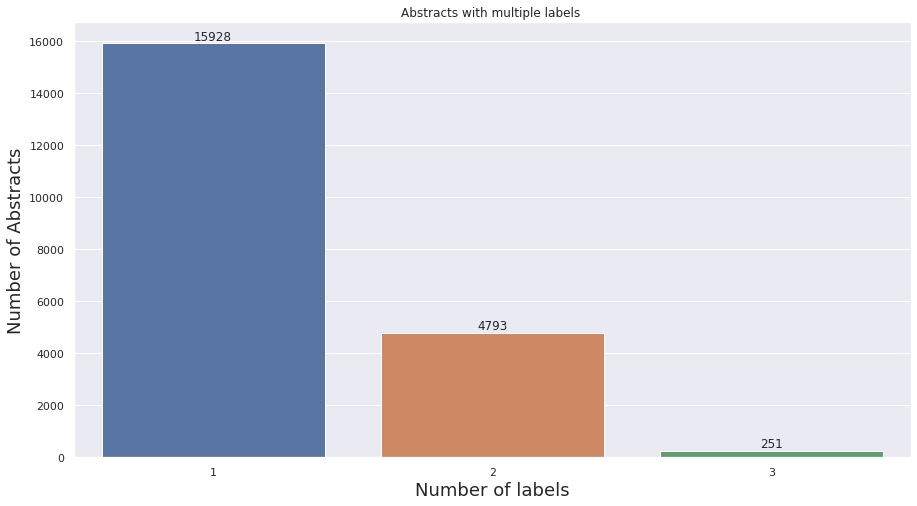

In [13]:
sns.set(font_scale = 1)
plt.figure(figsize=(15,8))
multiLabel_counts = trainData.iloc[:,3:].sum(axis=1).value_counts()

ax = sns.barplot(x = multiLabel_counts.index,y = multiLabel_counts)

plt.title("Abstracts with multiple labels ")
plt.ylabel('Number of Abstracts', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [20]:
trainData.groupby(['Computer Science', 'Physics']).count()

ID  TITLE  ABSTRACT  Mathematics  Statistics  \
Computer Science Physics                                                   
0                0        6857   6857      6857         6857        6857   
                 1        5521   5521      5521         5521        5521   
1                0        8102   8102      8102         8102        8102   
                 1         492    492       492          492         492   

                          Quantitative Biology  Quantitative Finance  
Computer Science Physics                                              
0                0                        6857                  6857  
                 1                        5521                  5521  
1                0                        8102                  8102  
                 1                         492                   492

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, ConditionalFreqDist
import string
import re

In [ ]:
re.search(r'\n', trainData['ABSTRACT'][0])

In [ ]:
# import spacy
# ! python -m spacy download en_core_web_lg
# spacy_lg = spacy.load('en_core_web_lg')

In [ ]:
# def stop_words(sentence):
#     return [word.lower() for word in sentence if word.lower() not in stopwords.words('english') if word.lower() not in string.punctuation]
# trainData['abstract_length'] = trainData['ABSTRACT'].apply(lambda x: len(x))
trainData['word_count'] = trainData['ABSTRACT'].apply(lambda x: len(word_tokenize(x)))
# trainData['ABSTRACT'].apply(lambda x: stop_words(word_tokenize(x)))



In [ ]:
def preprocessing(abstract):
    text = re.sub("\n"," ",abstract)
    processed = spacy_lg(text)
    return [sent for sent in processed.sents]

-------------------------------HERE-------------------------------------------

In [6]:
# !pip install tensorflow===2.9.1
# !pip install tf-models-official
import tensorflow as tf
print(tf.__version__)
import transformers
# import tensorflow_hub as hub
# import sys
# sys.path.append('models')
# from official.nlp.data import classifier_data_lib
# from official.nlp.tools import tokenization

2.6.4


In [ ]:
from tensorflow_models import nlp

In [5]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification, DistilBertTokenizerFast

pd.set_option('display.max_colwidth', None)
MODEL_NAME = 'distilbert-base-uncased'
BATCH_SIZE = 16
N_EPOCHS = 3

In [6]:
tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)
train_encodings = tokenizer(trainData.ABSTRACT.to_list(), truncation=True, padding=True)
# t_encodings = tokenizer(trainData.ABSTRACT.to_list(), truncation=True, padding=True)


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train_encodings['input_ids'][0]
train_encodings['attention_mask'][1]

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),
                                    list(trainData.iloc[:,3:9].values)))

2022-06-14 22:25:06.766060: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-14 22:25:06.766588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 22:25:06.767498: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 22:25:06.768166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [8]:
model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels = 6)
# model.summary()



# model(**tokenizer("Hello, my dog is cute", return_tensors="tf")).logits

# predicted_class_id = int(tf.math.argmax(logits, axis=-1)[0])
# model.config.id2label[predicted_class_id]
# num_labels = len(model.config.id2label)

# model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate= 5e-5)

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# loss = tf.nn.weighted_cross_entropy_with_logits()

model.compile(optimizer, loss, metrics=['accuracy'])


Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

2022-06-14 22:26:23.758118: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_layer_norm', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint 

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [9]:
# with tf.device('/GPU:0'):
model.fit(train_dataset.shuffle(len(trainData.ABSTRACT)).batch(BATCH_SIZE),epochs=N_EPOCHS,batch_size=BATCH_SIZE)

Epoch 1/3


2022-06-14 22:26:36.234868: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1311/1311 [==============================] - 713s 534ms/step - loss: 0.2050 - accuracy: 0.7510
Epoch 2/3
1311/1311 [==============================] - 701s 534ms/step - loss: 0.1486 - accuracy: 0.7881
Epoch 3/3
1311/1311 [==============================] - 700s 534ms/step - loss: 0.1160 - accuracy: 0.8099


In [12]:
model.save_pretrained('/kaggle/distilbert_base_uncased_model')

In [13]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  66362880  
_________________________________________________________________
pre_classifier (Dense)       multiple                  590592    
_________________________________________________________________
classifier (Dense)           multiple                  4614      
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
Total params: 66,958,086
Trainable params: 66,958,086
Non-trainable params: 0
_________________________________________________________________


In [15]:
import pickle
model.save_pretrained('./model/distilbert_base_uncased_model')
with open('./model/info.pkl', 'wb') as f:
    pickle.dump(('distilbert_base_uncased_model', 512), f)
    
new_model = TFDistilBertForSequenceClassification.from_pretrained('./model/distilbert_base_uncased_model')
model_name, max_len = pickle.load(open('./model/info.pkl', 'rb'))


Some layers from the model checkpoint at ./model/distilbert_base_uncased_model were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at ./model/distilbert_base_uncased_model and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
